In [1]:
from langgraph.graph import StateGraph , START ,END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [2]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str
    

In [3]:
def step_1(state: CrashState):
    print("step 1")
    return {"step1":"done"}
def step_2(state: CrashState):
    print("step 2")
    time.sleep(10)
    return {"step2":"done"}

def step_3(state: CrashState):
    print("step 3")
    return {"step3":"done"}

In [4]:
builder = StateGraph(CrashState)

builder.add_node("step_1",step_1)
builder.add_node("step_2",step_2)
builder.add_node("step_3",step_3)


builder.add_edge(START,"step_1")
builder.add_edge("step_1","step_2")
builder.add_edge("step_2","step_3")
builder.add_edge("step_3",END)  

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)


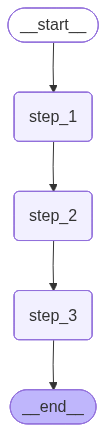

In [7]:
graph

In [9]:
try:
    print("Running graph")
    graph.invoke({"input":"start"},config = {"configurable":{"thread_id":1}})
except KeyboardInterrupt:
    print("Interrupted")
    

Running graph
step 1
step 2
Interrupted


In [10]:
final = graph.invoke(None,config = {"configurable":{"thread_id":1}})
print(final)

step 2
step 3
{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}
